In [1]:
import matplotlib.pyplot as plt

from config.project_config import get_data_path
from src.SolverAnalyses import ConvergenceAnalysis
from src.DataFrameAnalyses import DataFramePlotGenerator

In [2]:
logs_path = get_data_path("2025_08_17/Experiment_003")

In [3]:
log_file = "Shift_06.log"
log_path = logs_path / log_file

In [4]:
df_cp_logs = ConvergenceAnalysis.parse_cp_sat_bound_log_to_dataframe(
    file_path=log_path,

)
df_cp_logs

,Time,BestSol
0,0.07,41394.0
1,0.07,41394.0
2,0.08,41394.0
3,0.11,41394.0
4,0.14,41388.0
...,...,...
187,509.78,7717.0
188,518.59,7717.0
189,528.00,7717.0
190,537.64,7717.0


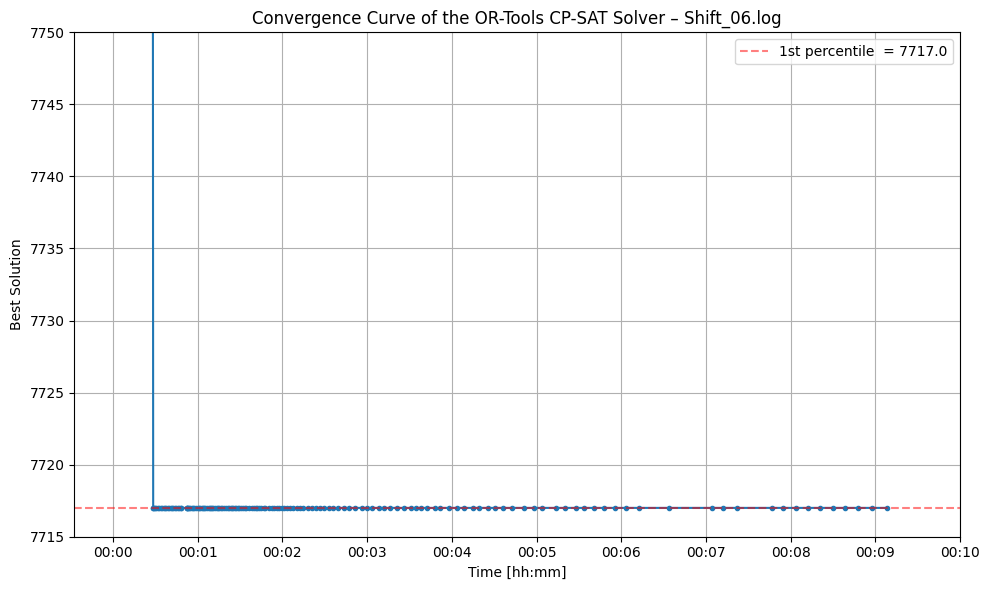

In [11]:
fig = DataFramePlotGenerator.get_convergence_plot_figure(
    df_cp_logs, time_col="Time", bestsol_col="BestSol",
    granularity="minutes", subtitle=log_file,
    y_max= 7750, x_max_minimum = 1
)
q_val = df_cp_logs["BestSol"].quantile(0.01)

ax = fig.axes[0]
ax.axhline(y=q_val, color="red", linestyle="--", alpha=0.5, label=f"1st percentile  = {q_val}")
ax.legend()
plt.show()